In [7]:
# load and plot dataset
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error

(144, 1)


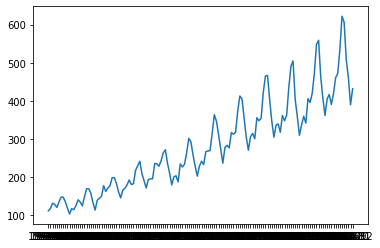

In [5]:
df = pd.read_csv('D://DS//Stater_Projects//airline.txt', header=0, index_col=0)
print(df.shape)
plt.plot(df)
plt.show()

In [6]:
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]


In [8]:
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [9]:
def model_fit(train, config):
    return None

In [10]:
def model_predict(model, history, offset):
    return history[-offset]

In [12]:
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        pred = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(pred)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

In [13]:
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [15]:
def grid_search(data, cfg_list, n_test):
    #evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [20]:
df = pd.read_csv('D://DS//Stater_Projects//airline.txt', header=0, index_col=0)
data = df.values

In [18]:
n_test = 12

In [19]:
cfg_list = [1, 6, 12, 24, 36]

In [21]:
scores = grid_search(data, cfg_list, n_test)
print('done')

 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
> Model[1] 53.152
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
> Model[6] 126.735
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
> Model[12] 50.708
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
> Model[24] 97.110
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
> Model[36] 110.274
done


In [22]:
for cfg, error in scores[:10]:
    print(cfg, error)

12 50.708316214732804
1 53.1515129919491
24 97.10990337413241
36 110.27352356753639
6 126.73495965991387
